# Imports

In [1]:
import torch
import numpy as np
from torchvision import transforms
from PIL import Image as PilImage
from matplotlib import pyplot as plt

from omnixai.preprocessing.image import Resize
from omnixai.data.image import Image
from omnixai.explainers.vision import VisionExplainer
from omnixai.visualization.dashboard import Dashboard

from omnixai.explainers.vision.agnostic.shap import ShapImage
from omnixai.explainers.vision.specific.guided_bp import GuidedBP
from omnixai.explainers.vision.specific.ig import IntegratedGradientImage
from omnixai.explainers.vision.specific.scorecam.pytorch.scorecam import ScoreCAM
from omnixai.explainers.vision.specific.gradcam.pytorch.gradcam import GradCAM, GradCAMPlus, LayerCAM

from Exp.model import ResNet18, Vgg16

2023-05-15 11:23:09.340711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 11:23:10.525376: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vuong.nguyen/.conda/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cudnn/11.2-v8.1.0/cuda/lib64:/usr/local/cuda-11.2/lib64:/home/vuong.nguyen/.conda/envs/tf/lib/:/home/vuong.nguyen/.conda/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib
2023-05-15 11:23:10.525503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'l

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Get bacth blue images

In [3]:
hw_origin_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_HW/Origin"
rv_origin_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_RV/Origin"

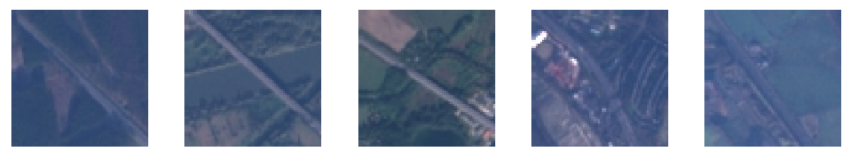

In [4]:
plt.rcParams["figure.figsize"] = [15, 6]
hw_origin = []
for id in range(5):
  plt.subplot(1, 5, id+1)
  img = PilImage.open(f"{hw_origin_path}/hw_{id+1}.png").convert('RGB')
  plt.imshow(img)
  plt.axis('off')
  new_img = Image(img)
  hw_origin.append(new_img.to_numpy())

In [5]:
hw_origin = np.stack(hw_origin, axis=1).squeeze()

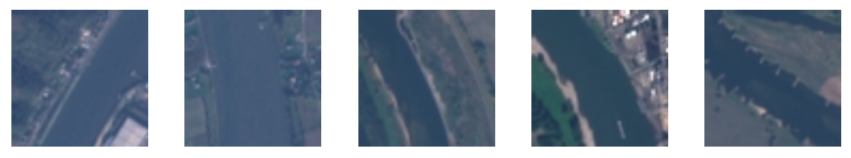

In [6]:
plt.rcParams["figure.figsize"] = [15, 6]
rv_origin = []
for id in range(5):
  plt.subplot(1, 5, id+1)
  img = PilImage.open(f"{rv_origin_path}/rv_{id+1}.png").convert('RGB')
  plt.imshow(img)
  plt.axis('off')
  new_img = Image(img)
  rv_origin.append(new_img.to_numpy())

In [7]:
rv_origin = np.stack(rv_origin, axis=1).squeeze()

# Vgg16

In [8]:
baseline_vgg16_model_2 = Vgg16(2)
baseline_vgg16_model_2.load_state_dict(torch.load(f"Exp/Output_Vgg16/Baseline/xai_checkpoint_baseline_1.pt"))

<All keys matched successfully>

In [9]:
flow_vgg16_model_2 = Vgg16(2)
flow_vgg16_model_2.load_state_dict(torch.load(f"Exp/Output_Vgg16/Flow/Aug/xai_checkpoint_augmentation_1.pt"))

<All keys matched successfully>

# Explainable AI

In [10]:
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor()
])

preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

postprocess = lambda logits: torch.nn.functional.softmax(logits, dim=1)

In [11]:
hw_origin = Image(
    data=hw_origin,
    batched=True
)

rv_origin = Image(
    data=rv_origin,
    batched=True
)

## Highway

### Baseline

In [ ]:
hw_vgg16_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_HW/Origin/Vgg16/Baseline"

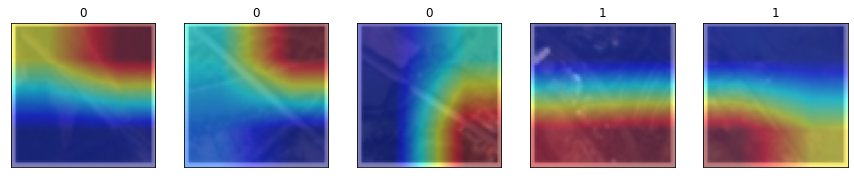

In [ ]:
explainer = GradCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_1.png")

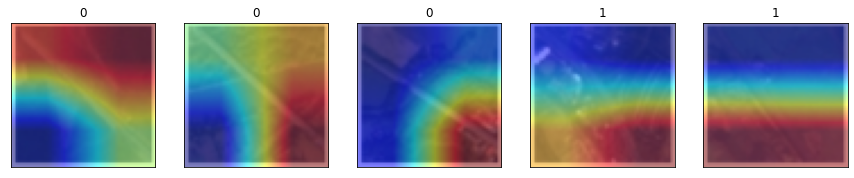

In [ ]:
explainer = GradCAMPlus(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_2.png")

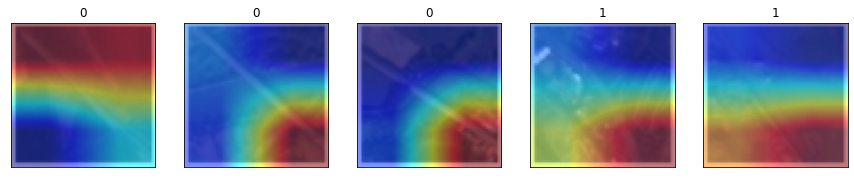

In [ ]:
explainer = LayerCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_3.png")

100%|██████████| 512/512 [00:40<00:00, 12.73it/s]


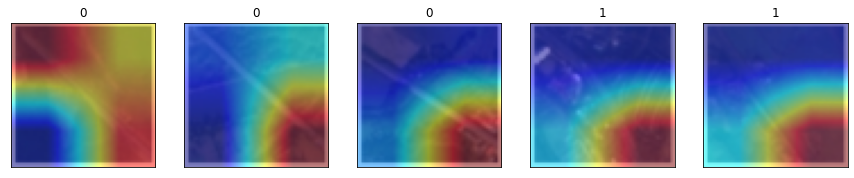

In [ ]:
explainer = ScoreCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_4.png")

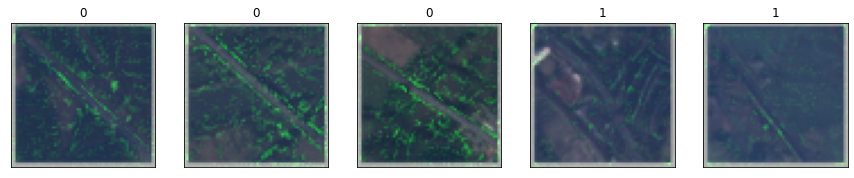

In [ ]:
explainer = IntegratedGradientImage(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_5.png")

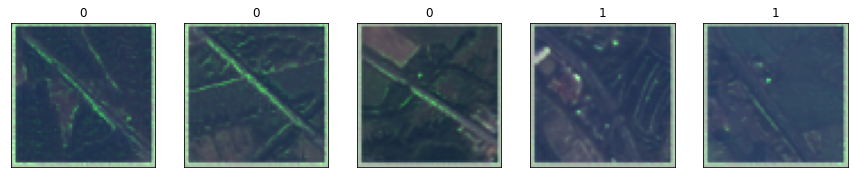

In [ ]:
explainer = GuidedBP(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_6.png")

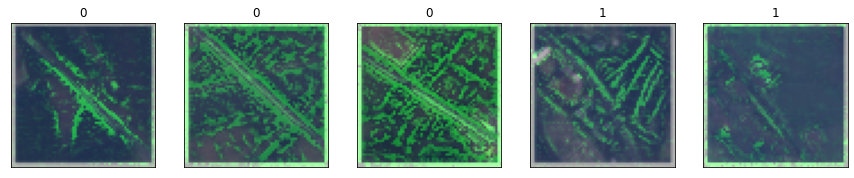

In [ ]:
explainer = ShapImage(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_7.png")

### Augmentation

In [ ]:
hw_vgg16_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_HW/Origin/Vgg16/Aug"

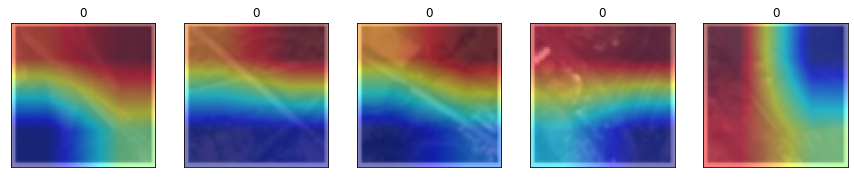

In [ ]:
explainer = GradCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_1.png")

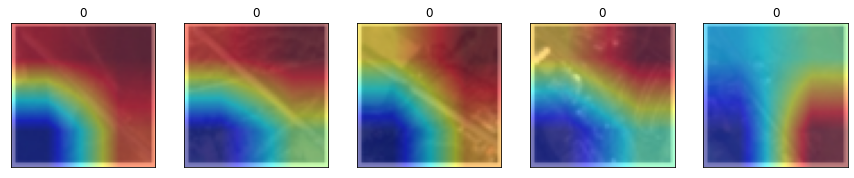

In [ ]:
explainer = GradCAMPlus(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_2.png")

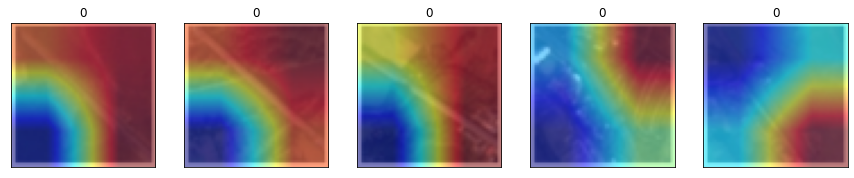

In [ ]:
explainer = LayerCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_3.png")

100%|██████████| 512/512 [00:39<00:00, 12.94it/s]


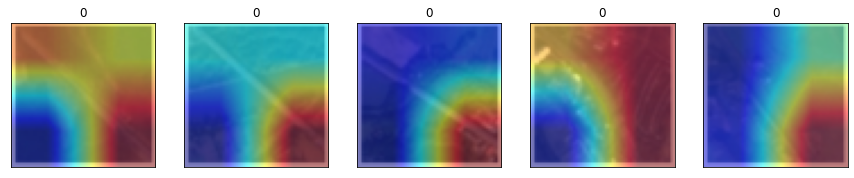

In [ ]:
explainer = ScoreCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_4.png")

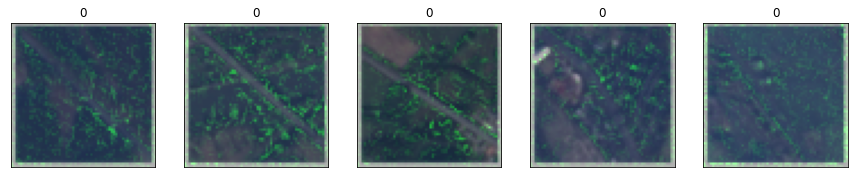

In [ ]:
explainer = IntegratedGradientImage(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_5.png")

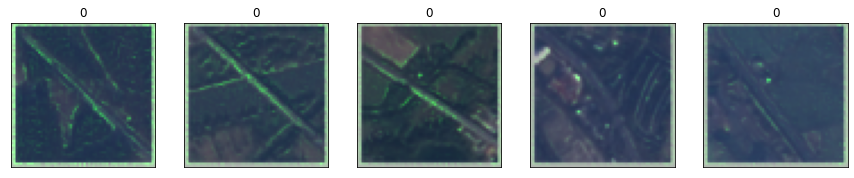

In [ ]:
explainer = GuidedBP(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_6.png")

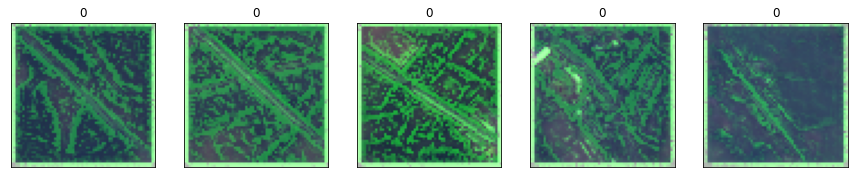

In [ ]:
explainer = ShapImage(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(hw_origin)
explanations.plot(save_path=f"{hw_vgg16_path}/res_7.png")

## River

### Baseline

In [ ]:
rv_vgg16_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_RV/Origin/Vgg16/Baseline"

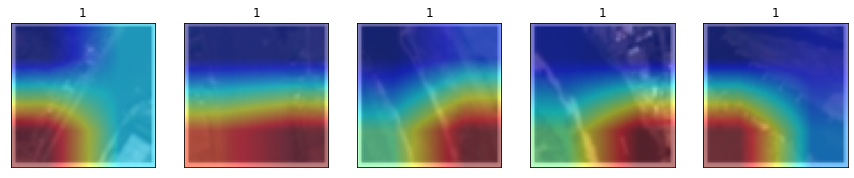

In [ ]:
explainer = GradCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_1.png")

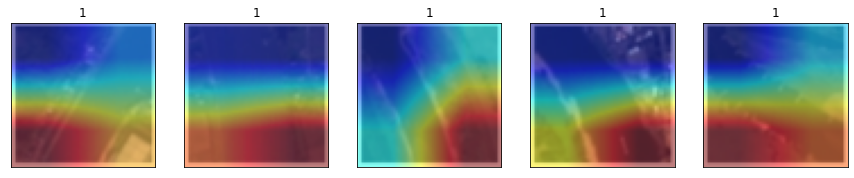

In [ ]:
explainer = GradCAMPlus(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_2.png")

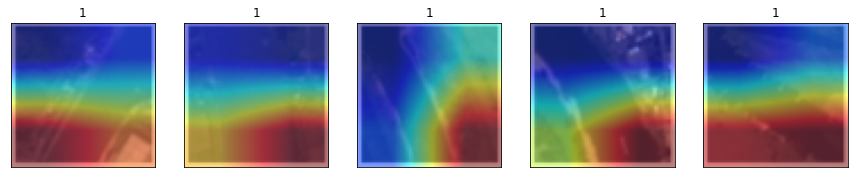

In [ ]:
explainer = LayerCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_3.png")

100%|██████████| 512/512 [00:40<00:00, 12.70it/s]


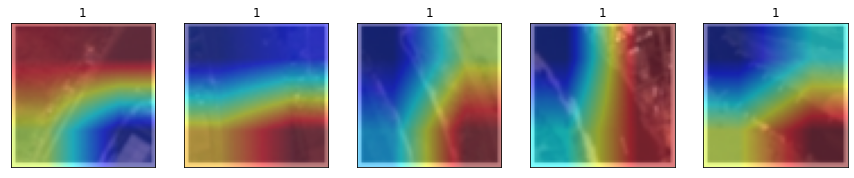

In [ ]:
explainer = ScoreCAM(
    model=baseline_vgg16_model_2,
    target_layer=baseline_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_4.png")

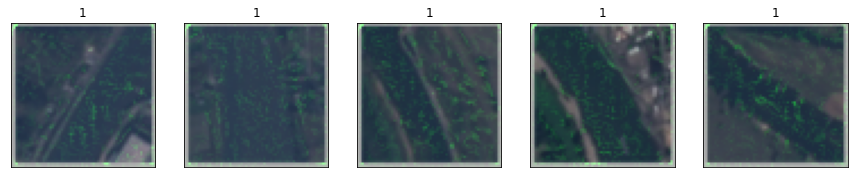

In [ ]:
explainer = IntegratedGradientImage(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_5.png")

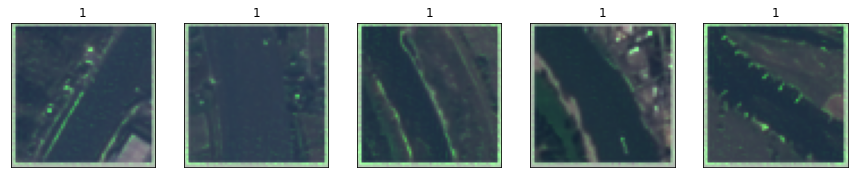

In [ ]:
explainer = GuidedBP(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_6.png")

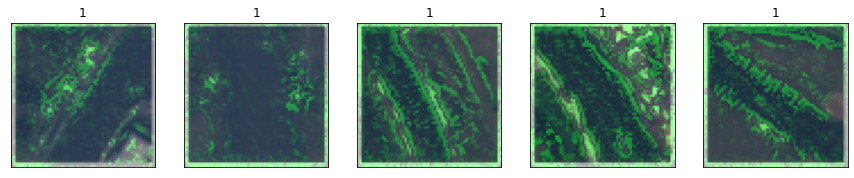

In [ ]:
explainer = ShapImage(
    model=baseline_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_7.png")

### Augmentation

In [12]:
rv_vgg16_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/X_RV/Origin/Vgg16/Aug"

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


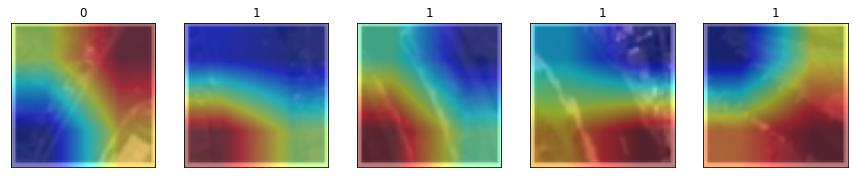

In [13]:
explainer = GradCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_1.png")

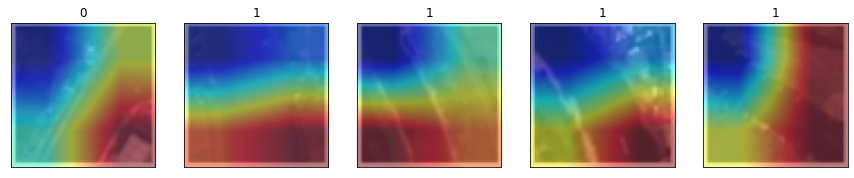

In [14]:
explainer = GradCAMPlus(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_2.png")

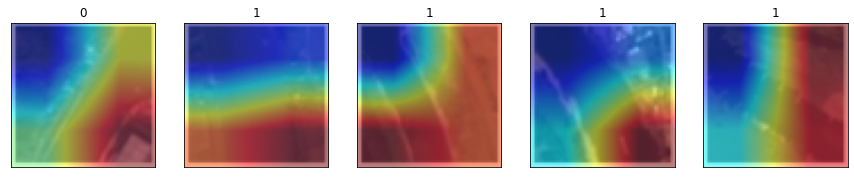

In [15]:
explainer = LayerCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_3.png")

100%|██████████| 512/512 [00:39<00:00, 12.86it/s]


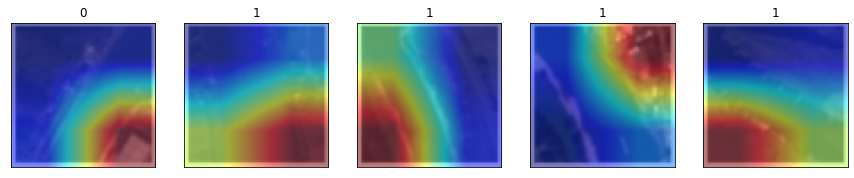

In [16]:
explainer = ScoreCAM(
    model=flow_vgg16_model_2,
    target_layer=flow_vgg16_model_2.classifier.features,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_4.png")

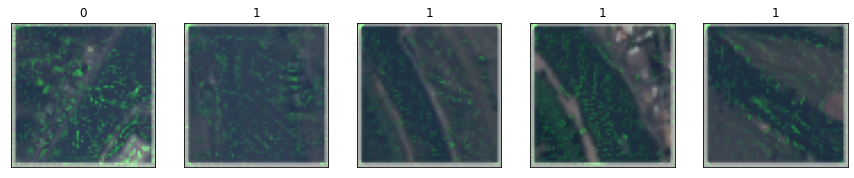

In [17]:
explainer = IntegratedGradientImage(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_5.png")

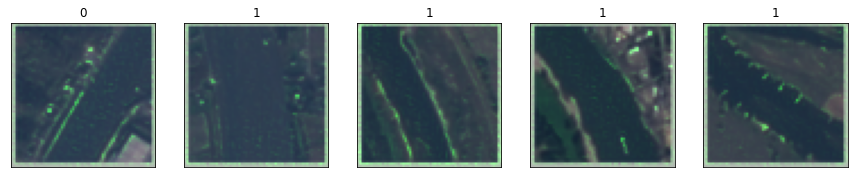

In [18]:
explainer = GuidedBP(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_6.png")

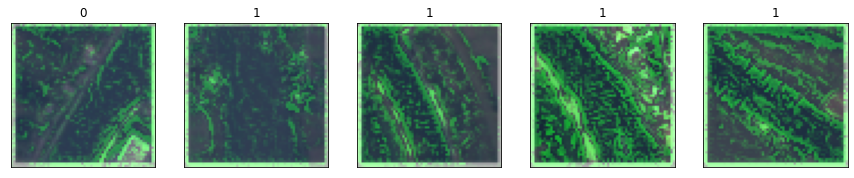

In [19]:
explainer = ShapImage(
    model=flow_vgg16_model_2.classifier,
    preprocess_function=preprocess,
    mode="classification"
)

explanations = explainer.explain(rv_origin)
explanations.plot(save_path=f"{rv_vgg16_path}/res_7.png")